In [37]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Load MNIST data from Keras

In [38]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [39]:
print('Training samples:', len(x_train))

print('Testing samples:', len(x_test))

print('Shape of individual sample:', x_train[0].shape)


Training samples: 60000
Testing samples: 10000
Shape of individual sample: (28, 28)


In [40]:
# Inspect an image
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

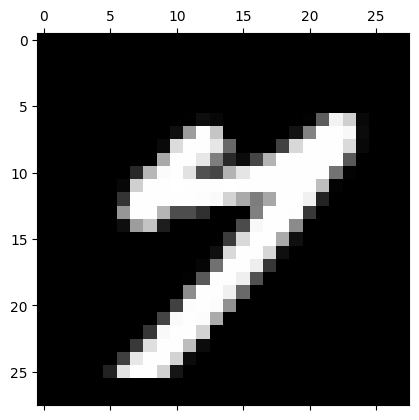

In [41]:
# view as image
plt.matshow(x_train[1001], cmap='gray')

In [42]:
y_train[1001]

7

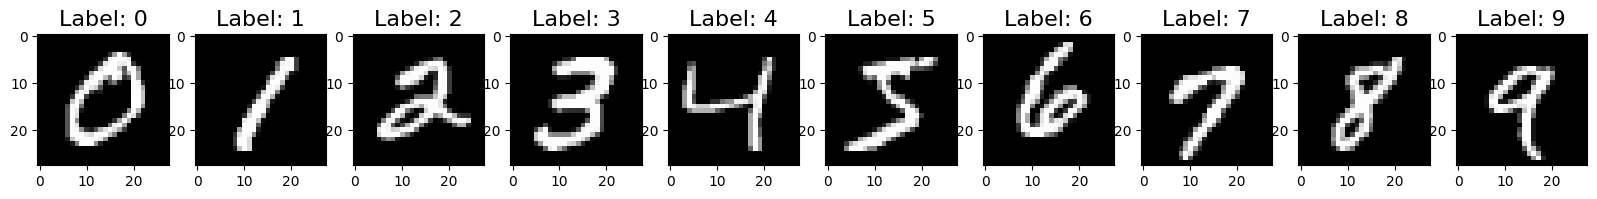

In [43]:
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

### Scale the data

The image data has values between 0 and 255. We want to scale them to be in the range 0 to 1

In [44]:
x_train = x_train / 255
x_test = x_test / 255

In [45]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Flatten the images
Make image data 1d instead of 2d

In [46]:
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_test_flattened = x_test.reshape(len(x_test), 28*28)

In [47]:
# Check shape
x_train.shape

(60000, 28, 28)

In [48]:
# Check shape
x_train_flattened.shape

(60000, 784)

In [49]:
# Check shape
x_test_flattened.shape

(10000, 784)

In [50]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

## Create initial Neural Network in Keras

We will initially use a simple network that only has an input and an output layer.

As our images has 784 pixels, the input layer will consist of 784 neurons, and as we have 10 classes to predict (the values 0 - 9) we have an output layer with 10 neurons.

In [108]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
    ]
)

# Helps with backproagation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 1s 621us/step - loss: 0.4661 - accuracy: 0.8788
Epoch 2/5
1875/1875 [==============================] - 1s 623us/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 1s 627us/step - loss: 0.2832 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 1s 628us/step - loss: 0.2734 - accuracy: 0.9235
Epoch 5/5
1875/1875 [==============================] - 1s 622us/step - loss: 0.2667 - accuracy: 0.9256


In [109]:
# Evaluate model

model.evaluate(x_train_flattened, y_train)

1875/1875 [==============================] - 1s 549us/step - loss: 0.2566 - accuracy: 0.9288


[0.2565813362598419, 0.9287999868392944]

In [110]:
# Make test prediction
y_predicted = model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 492us/step


array([1.95422433e-02, 2.99951495e-07, 4.37247120e-02, 9.43597913e-01,
       2.31887517e-03, 9.93084013e-02, 1.04465983e-06, 9.99786496e-01,
       1.05376564e-01, 6.91670656e-01], dtype=float32)

In [111]:
np.argmax(y_predicted[0])

7

Show image

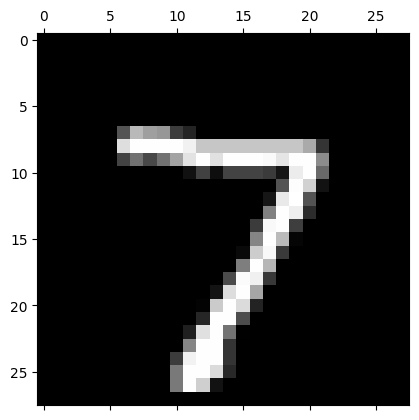

In [112]:
plt.matshow(x_test[0], cmap='gray')

In [113]:
y_test[0]

7

Create labels

In [114]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

Check against answer

In [115]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

Create a Confusion Matrix

In [116]:
cm1 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm1

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    6,    4,    3,    1,    1],
       [   0, 1110,    3,    2,    1,    1,    4,    2,   12,    0],
       [   6,    9,  929,   16,    8,    4,   11,   10,   34,    5],
       [   4,    0,   18,  926,    0,   23,    2,   11,   17,    9],
       [   1,    1,    4,    1,  921,    0,   10,    4,    7,   33],
       [   9,    2,    5,   38,    9,  782,   10,    5,   24,    8],
       [  13,    3,    8,    1,    8,   18,  903,    2,    2,    0],
       [   1,    5,   22,    6,    9,    0,    0,  942,    2,   41],
       [   7,    7,    7,   26,    9,   32,    8,   11,  852,   15],
       [  11,    7,    1,   10,   28,    7,    0,   15,    5,  925]])>

Text(95.72222222222221, 0.5, 'Truth')

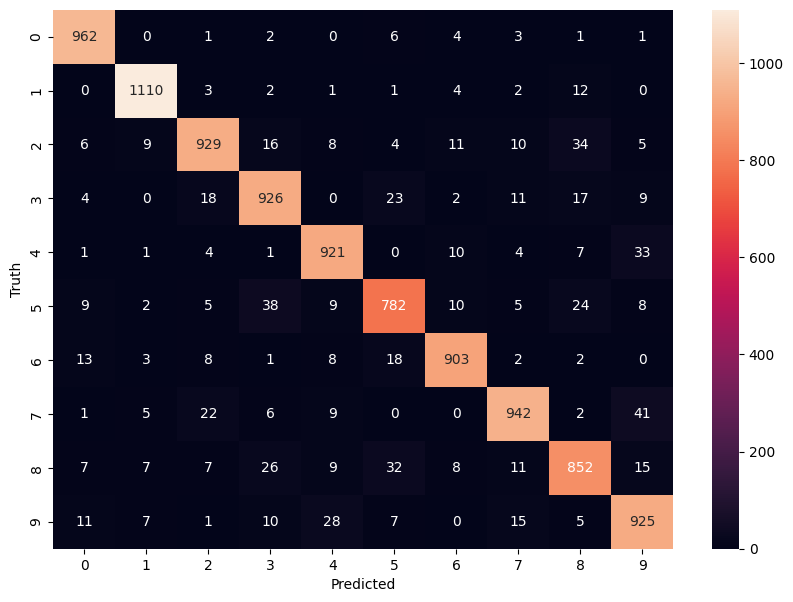

In [117]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm1, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Add a hidden layer to our network

In [119]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784, ), activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')
    ]
)

# Helps with backproagation
model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2440 - accuracy: 0.9307
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1019 - accuracy: 0.9699
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0676 - accuracy: 0.9790
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0481 - accuracy: 0.9851
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0379 - accuracy: 0.9883


In [120]:
model2.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 0s 695us/step - loss: 0.0708 - accuracy: 0.9795


[0.07083314657211304, 0.9794999957084656]

In [121]:
y_predicted = model2.predict(x_test_flattened)


313/313 [==============================] - 0s 622us/step


In [122]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [123]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 975,    1,    1,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1124,    4,    0,    0,    1,    2,    0,    4,    0],
       [   5,    0, 1009,    0,    1,    0,    2,    8,    6,    1],
       [   0,    0,    7,  969,    1,   10,    0,    9,    9,    5],
       [   0,    0,    1,    0,  969,    1,    4,    2,    1,    4],
       [   2,    0,    0,    3,    1,  882,    2,    1,    0,    1],
       [   5,    2,    0,    0,    2,    5,  941,    0,    3,    0],
       [   1,    3,    6,    0,    0,    0,    0, 1011,    2,    5],
       [   7,    0,    4,    0,    5,    6,    1,    4,  943,    4],
       [   3,    4,    0,    6,    9,    2,    0,   10,    3,  972]])>

Text(95.72222222222221, 0.5, 'Truth')

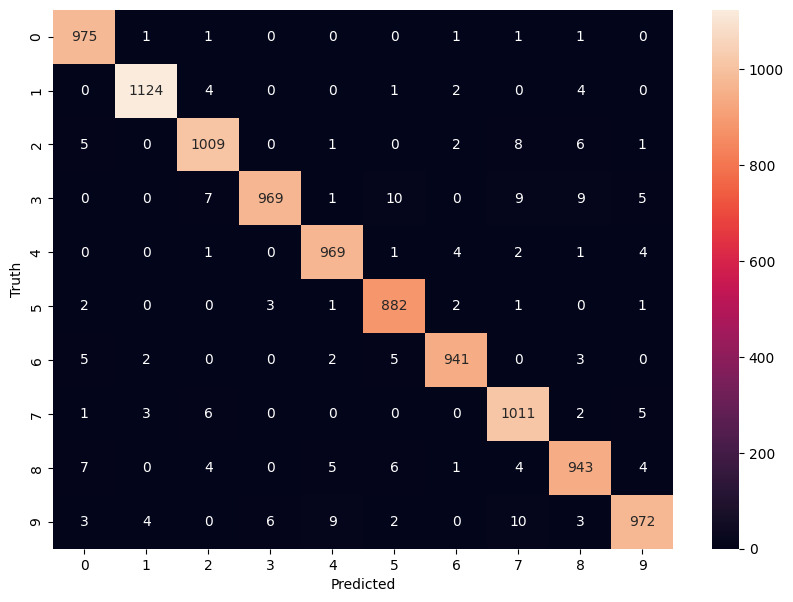

In [124]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Show some errors

In [125]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [127]:
y_error_indexes = [i for i, error in enumerate(errors) if error]
len(y_error_indexes)

205

In [138]:
idx = y_error_indexes[1]

predicted_value = y_predicted_labels[idx]
true_value = y_test[idx]

In [139]:
print(predicted_value)
print(true_value)

2
4


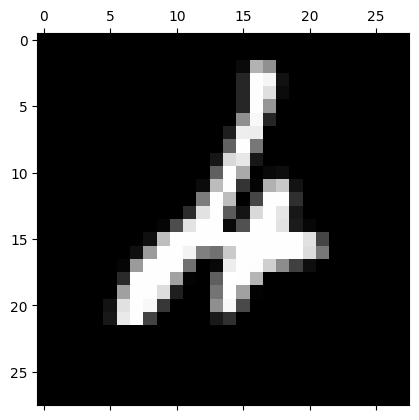

In [140]:
plt.matshow(x_test[idx], cmap='gray')

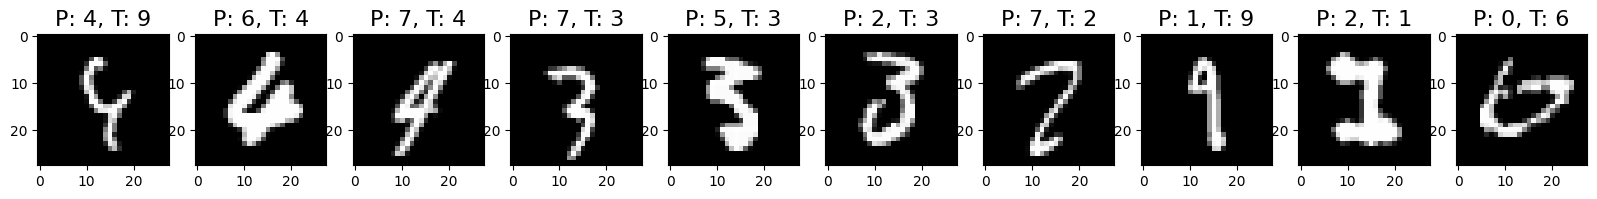

In [153]:
import random
idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes)-1)] for _ in range(10)]
num_classes = 10

f, ax = plt.subplots(1, num_classes, figsize=(20, 20))

for i, idx in enumerate(idx_to_check):
    sample = x_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'P: {predicted_value}, T: {true_value}', fontsize=16)

Working with our own images

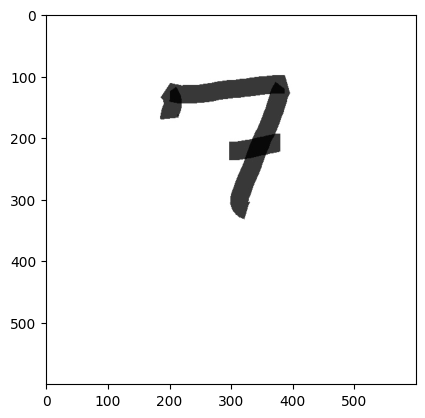

In [154]:
import cv2
my_img = cv2.imread('number.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(my_img, cmap='gray')

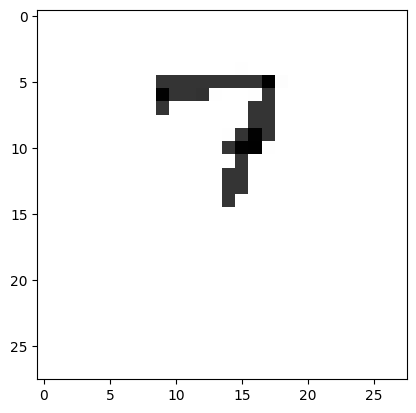

In [155]:
my_img = cv2.resize(my_img, (28, 28), interpolation=cv2.INTER_LINEAR)
plt.imshow(my_img, cmap='gray')

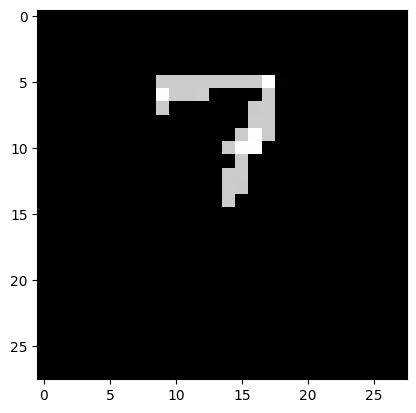

In [156]:
my_img = cv2.bitwise_not(my_img)
plt.imshow(my_img, cmap='gray')